# 데이터 확인

In [ ]:
# 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

설치 후 런타임 재시작 해줘야 폰트가 설정 됩니다.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 데이터 불러오기
import pandas as pd
sales_member_product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project3,4/sales_member_product.csv',low_memory=False)
member = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project3,4/Member_data02.csv',low_memory=False)


In [3]:
sales_member_product.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
sales_member_product

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,...,거주지역_num,유입경로_num,배송기간,할인금액,상품군,상품대분류군,주말여부,label,class,상품대분류_기저귀
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),...,0,0,4,9486,젖꼭지,수유용품,0.0,0,2,수유용품
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),...,0,0,2,13431,팬티,기저귀,0.0,0,2,5.0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,...,1,1,4,1810,티슈_화장지_키친타월,유아용품 외,0.0,0,0,유아용품 외
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),...,2,2,2,11598,기저귀,기저귀,0.0,0,3,3.0
4,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),...,2,2,2,11598,기저귀,기저귀,0.0,0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,202001313357732,2020-02-01,2020-02-02,2020-02-04,8.0,201912291058168,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),...,6,1,2,7949,팬티,기저귀,1.0,0,3,3.0
209589,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),...,6,1,2,59,체험팩,체험팩,0.0,0,0,3.0
209590,20200718082624-57943215331,2020-07-18,2020-07-19,2020-07-23,13.0,201912291058168,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),...,6,1,4,26212,팬티,기저귀,1.0,0,3,4.0
209591,201912293246143,2019-12-29,2019-12-30,2020-01-01,NaN,201912291058169,51000,36579,팬티,2020 하기스 맥스드라이 팬티 4단계 공용 96매(팬티형),...,5,0,2,14421,팬티,기저귀,0.0,0,2,4.0


In [6]:
# 문자열로 변환
member['ID'] = member['ID'].astype('str')

In [7]:
# member 잘리는거 방지
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
pd.set_option('display.float_format', None)

# 데이터 전처리

## 범주형을 수치형으로

In [5]:
member_c = member.copy()

In [6]:
# 성별을 수치형으로(남0 여1)
member_c['성별_num'] = member_c['성별'].apply(lambda x: 1 if x=='여' else 0)

In [7]:

# 모든 컬럼보기
pd.set_option('display.max_columns', None)

In [8]:
# 자녀 여부를 수치형으로(Yes1 No0)
member_c['자녀여부_num'] = member_c['자녀여부'].apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
# 결혼유무를 수치형으로(기혼1 미혼0)
member_c['결혼유무_num'] = member_c['결혼유무'].apply(lambda x: 1 if x=='기혼' else 0)

In [10]:
# 거주지역 리스트
region_list  = sales_member_product['거주지역'].unique()
region_list

array(['인천', '제주', '부산', '경남', '서울', '경기', '충북', '광주', '충남', '경북', '대전',
       '강원', '대구', '전남', '전북'], dtype=object)

In [11]:
# 거주지역에 숫자 부여
def region(x):
    for i,r in enumerate(region_list):
        if x==r:
            return i

In [12]:
# 거주지역을 수치형으로
# '인천' 0, '제주' 1, '부산' 2, '경남' 3, '서울' 4, '경기' 5, '충북' 6, '광주' 7, '충남 8', '경북' 9, '대전' 10,'강원' 11, '대구' 12, '전남' 13, '전북' 14
member_c['거주지역_num'] = member_c['거주지역'].apply(lambda x: region(x))

In [13]:
come_list  = sales_member_product['유입경로'].unique()
come_list

array(['인스타그램', '검색광고', '네이버블로그', '지인추천', '직접검색', '네이버카페', '오픈마켓', '페이스북',
       '매장쿠폰', '이마트'], dtype=object)

In [14]:
def come(x):
    for i,r in enumerate(come_list):
        if x==r:
            return i

In [15]:
# 유입경로 수치형으로
# '인스타그램' 0, '검색광고' 1, '네이버블로그' 2, '지인추천' 3, '직접검색' 4, '네이버카페' 5, '오픈마켓' 6, '페이스북' 7, '매장쿠폰' 8, '이마트' 9
member_c['유입경로_num'] = member_c['유입경로'].apply(lambda x: come(x))

# 클러스터링

## 차원 축소

In [ ]:
sales_member_product

In [16]:
sub = member_c[['연령','성별_num','자녀여부_num','결혼유무_num','거주지역_num','유입경로_num']].copy()
sub.dropna(inplace=True)
sub

,연령,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num
0,37.0,1,1,1,0.0,0.0
1,33.0,1,1,1,1.0,1.0
2,32.0,1,1,1,2.0,2.0
3,34.0,1,0,0,3.0,3.0
4,32.0,1,1,1,4.0,4.0
...,...,...,...,...,...,...
81089,31.0,1,1,1,5.0,6.0
81090,37.0,1,1,1,3.0,6.0
81091,26.0,1,1,1,6.0,1.0
81092,32.0,1,1,1,5.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(sub)
sub_sc = sc.transform(sub)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sub_sc)
sub_pca = pca.transform(sub_sc)

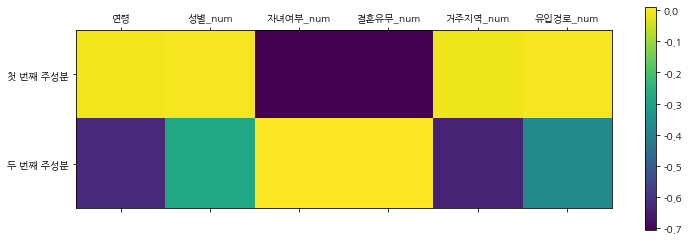

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['첫 번째 주성분','두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(sub.columns)),sub.columns)
plt.show()

## k-means

In [25]:
# df 만들기
from sklearn.cluster import KMeans

km_col = ['comp1','comp2']
km_df = pd.DataFrame(sub_pca, columns=km_col)
km_df.dropna(inplace=True)

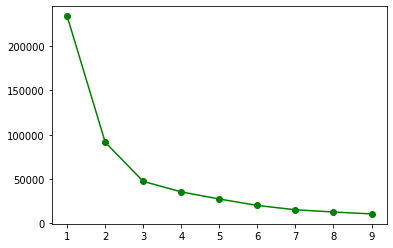

In [26]:

sse=[]
for i in range(1,10):
    km =KMeans(n_clusters=i)
    km.fit(sub_pca)
    sse.append(km.inertia_)
plt.plot(range(1,10),sse,'go-')
plt.show()

In [27]:
# k-means
km = KMeans(n_clusters=3, init='random',max_iter=100, random_state=0)
km.fit(sub_pca)
label_km = km.labels_
label_km

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [28]:
# 컬럼추가
km_df['label']=label_km
km_df

,comp1,comp2,label
0,-0.641599,0.527918,1
1,-0.635751,0.988724,1
2,-0.637317,0.820205,1
3,3.095031,-0.022908,2
4,-0.645390,0.063617,1
...,...,...,...
81089,-0.648236,-0.300596,0
81090,-0.657550,-1.194046,0
81091,-0.632234,1.544150,1
81092,-0.643023,0.663794,1


In [29]:
km_df.dropna(inplace=True)
len(km_df)

81094

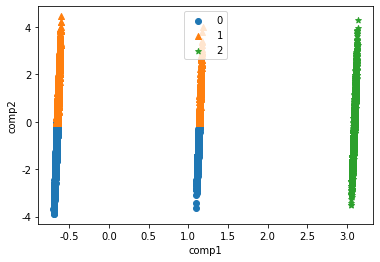

In [30]:
# 시각화
markers=['o','^','*']
for i,m in enumerate(markers):
    df_i = km_df[km_df['label']==i]
    x1 = df_i['comp1']
    x2 = df_i['comp2']
    plt.scatter(x1,x2,marker=m, label=i)
plt.legend(loc='upper center')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

## dbscan

In [31]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3,min_samples=100)
db.fit(sub_pca)
label_db = db.labels_
label_db

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# df 만들기
db_col = ['comp1','comp2']
db_df = pd.DataFrame(sub_pca, columns=db_col)
db_df['label']=label_db
db_df.dropna(inplace=True)
len(db_df)

81094

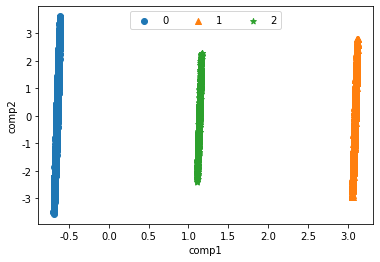

In [33]:
# 시각화
markers=['o','^','*']
for i,m in enumerate(markers):
    df_i = db_df[db_df['label']==i]
    x1 = df_i['comp1']
    x2 = df_i['comp2']
    plt.scatter(x1,x2,marker=m, label=i)
plt.legend(loc='upper center',ncol=4)
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

## 그룹 확인

In [34]:
member_c.dropna(inplace=True)

In [35]:
sub_d = member_c.copy()
sub_d['label']= db_df['label']

In [36]:

sub_d.dropna(inplace=True)

In [37]:
len(sub_d['label'])

81094

In [38]:
sub_d['label'].unique()

array([ 0,  1, -1,  2])

In [39]:
len(sub_d[sub_d['label']== 0])

65298

In [40]:
len(sub_d[sub_d['label']== 2])

3109

In [41]:
len(sub_d[sub_d['label']== 1])

12502

In [42]:
len(sub_d[sub_d['label']== -1.0])

185

In [43]:
sub_d_0 = sub_d[sub_d['label']== 0]
sub_d_0['결혼유무_num'].unique()

array([1])

In [44]:
sub_d_0['자녀여부_num'].unique()
# 0은 기혼 자녀

array([1])

In [45]:
sub_d_1 = sub_d[sub_d['label']== 1]

In [46]:
sub_d_1['결혼유무_num'].unique()

array([0])

In [47]:
sub_d_1['자녀여부_num'].unique()
# 1은 미혼 노자녀

array([0])

In [48]:
sub_d_1.columns

Index(['ID', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '성별_num',
       '자녀여부_num', '결혼유무_num', '거주지역_num', '유입경로_num', 'label'],
      dtype='object')

In [49]:
sub_d_2 = sub_d[sub_d['label']== 2]

In [50]:
sub_d_2['결혼유무_num'].unique()

array([1])

In [51]:
sub_d_2['자녀여부_num'].unique()
# 2는 기혼 노자녀

array([0])

# 클러스터링 기준 그루핑

In [52]:
sales_member_product['label'] =-1
sales_member_product

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매일_년월,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,상품군,상품대분류군,주말여부,label,class,상품대분류_기저귀
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),201905,여,기혼,인천,37.0,국민은행,인스타그램,Yes,2767,20583,1,1,1,0,0,4,9486,젖꼭지,수유용품,0.0,-1,2,수유용품
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),202002,여,기혼,인천,37.0,국민은행,인스타그램,Yes,253,53648,1,1,1,0,0,2,13431,팬티,기저귀,0.0,-1,2,5.0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,201902,여,기혼,제주,33.0,국민은행,검색광고,Yes,450,8864,1,1,1,1,1,4,1810,티슈_화장지_키친타월,유아용품 외,0.0,-1,0,유아용품 외
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),201905,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,872,65117,1,1,1,2,2,2,11598,기저귀,기저귀,0.0,-1,3,3.0
4,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),201905,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,51,58086,1,1,1,2,2,2,11598,기저귀,기저귀,0.0,-1,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,202001313357732,2020-02-01,2020-02-02,2020-02-04,8.0,201912291058168,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),202002,여,기혼,충북,26.0,삼성카드,검색광고,Yes,797,62106,1,1,1,6,1,2,7949,팬티,기저귀,1.0,-1,3,3.0
209589,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),202002,여,기혼,충북,26.0,삼성카드,검색광고,Yes,604,5900,1,1,1,6,1,2,59,체험팩,체험팩,0.0,-1,0,3.0
209590,20200718082624-57943215331,2020-07-18,2020-07-19,2020-07-23,13.0,201912291058168,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),202007,여,기혼,충북,26.0,삼성카드,검색광고,Yes,723,59701,1,1,1,6,1,4,26212,팬티,기저귀,1.0,-1,3,4.0
209591,201912293246143,2019-12-29,2019-12-30,2020-01-01,NaN,201912291058169,51000,36579,팬티,2020 하기스 맥스드라이 팬티 4단계 공용 96매(팬티형),201912,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,155,51000,1,1,1,5,0,2,14421,팬티,기저귀,0.0,-1,2,4.0


In [53]:
index_0 = sales_member_product[(sales_member_product['자녀여부_num']==1) & (sales_member_product['결혼유무_num']==1)].index
sales_member_product.loc[index_0,'label']=0

In [54]:
index_1 = sales_member_product[(sales_member_product['자녀여부_num']==0) & (sales_member_product['결혼유무_num']==0)].index
sales_member_product.loc[index_1,'label']=1

In [55]:
index_2 = sales_member_product[(sales_member_product['자녀여부_num']==0) & (sales_member_product['결혼유무_num']==1)].index
sales_member_product.loc[index_2,'label']=2

In [56]:
sales_member_product.groupby(['label','물품대분류']).count()
# 전부 기저귀 많이 삼
# 0은 기저귀 더블하트 체험팩 순
# 1은 기저귀 더블하트 체험팩 순
# 2는 기저귀 체험팩 더블하트 순

주문번호    구매일  배송시작일  배송완료일  구매시월령(수정)   고객번호   구매금액   결제금액  \
label 물품대분류                                                               
0     FC     10107  10107  10107  10107       6822  10107  10107  10107   
      FMC    20898  20898  20898  20898      13230  20898  20898  20898   
      SKC     7526   7526   7526   7526       5943   7526   7526   7526   
      SrC       11     11     11     11          9     11     11     11   
      기저귀    35042  35042  35042  35042      31391  35042  35042  35042   
      기타      6581   6581   6581   6581       5689   6581   6581   6581   
      더블하트   29953  29953  29953  29953      27442  29953  29953  29953   
      물티슈     6944   6944   6944   6944       5050   6944   6944   6944   
      체험팩    28439  28439  28439  28439      25888  28439  28439  28439   
      팬티     23459  23459  23459  23459      21197  23459  23459  23459   
1     FC      1886   1886   1886   1886       1247   1886   1886   1886   
      FMC     3998   3998   3998   3998       2487   3998   3998   3998   
      SKC     1455   1455   1455   1455       1104   1455   1455   1455   
      SrC        1      1      1      1          1      1      1      1   
      기저귀     6628   6628   6628   6628       5899   6628   6628   6628   
      기타      1247   1247   1247   1247       1055   1247   1247   1247   
      더블하트    5672   5672   5672   5672       5163   5672   5672   5672   
      물티슈     1285   1285   1285   1285        924   1285   1285   1285   
      체험팩     5522   5522   5522   5522       5026   5522   5522   5522   
      팬티      4391   4391   4391   4391       3981   4391   4391   4391   
2     FC       440    440    440    440        303    440    440    440   
      FMC     1054   1054   1054   1054        679   1054   1054   1054   
      SKC      384    384    384    384        310    384    384    384   
      SrC        3      3      3      3          1      3      3      3   
      기저귀     1791   1791   1791   1791       1581   1791   1791   1791   
      기타       347    347    347    347        281    347    347    347   
      더블하트    1603   1603   1603   1603       1452   1603   1603   1603   
      물티슈      316    316    316    316        223    316    316    316   
      체험팩     1429   1429   1429   1429       1319   1429   1429   1429   
      팬티      1181   1181   1181   1181       1084   1181   1181   1181   

               상품명  구매일_년월     성별   결혼유무   거주지역     연령  결제등록카드   유입경로   자녀여부  \
label 물품대분류                                                                    
0     FC     10107   10107  10107  10107  10107  10107   10107  10107  10107   
      FMC    20898   20898  20898  20898  20898  20898   20898  20898  20898   
      SKC     7526    7526   7526   7526   7526   7526    7526   7526   7526   
      SrC       11      11     11     11     11     11      11     11     11   
      기저귀    35042   35042  35042  35042  35042  35042   35042  35042  35042   
      기타      6581    6581   6581   6581   6581   6581    6581   6581   6581   
      더블하트   29953   29953  29953  29953  29953  29953   29953  29953  29953   
      물티슈     6944    6944   6944   6944   6944   6944    6944   6944   6944   
      체험팩    28439   28439  28439  28439  28439  28439   28439  28439  28439   
      팬티     23459   23459  23459  23459  23459  23459   23459  23459  23459   
1     FC      1886    1886   1886   1886   1886   1886    1886   1886   1886   
      FMC     3998    3998   3998   3998   3998   3998    3998   3998   3998   
      SKC     1455    1455   1455   1455   1455   1455    1455   1455   1455   
      SrC        1       1      1      1      1      1       1      1      1   
      기저귀     6628    6628   6628   6628   6628   6628    6628   6628   6628   
      기타      1247    1247   1247   1247   1247   1247    1247   1247   1247   
      더블하트    5672    5672   5672   5672   5672   5672    5672   5672   5672   
      물티슈     1285    1285   1285   1285   1285   1285    1285   1285   1285   
      체험팩    

# 물품대분류별 배송

In [57]:
sales_member_product.groupby('물품대분류').mean()
# 배송일 비슷

,구매시월령(수정),고객번호,구매금액,결제금액,구매일_년월,연령,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,주말여부,label,class
물품대분류,,,,,,,,,,,,,,,,,,
FC,29.112040,2.019046e+14,10680.563822,7456.773265,201938.598005,32.827717,227.217968,10670.895681,0.970562,0.812917,0.848307,6.178316,1.690662,2.368294,3223.790557,0.278453,0.222472,0.654709
FMC,33.441815,2.019046e+14,15673.747977,11551.865742,201940.873102,32.791792,451.003584,15672.039769,0.967437,0.805318,0.845934,6.084586,1.725434,2.371329,4121.882235,0.273642,0.235299,1.042351
SKC,36.271714,2.019048e+14,19498.773091,12484.115109,201930.425200,32.822637,287.128243,19496.473358,0.972878,0.803631,0.844634,6.137427,1.711692,2.371810,7014.657982,0.263214,0.237373,1.351628
SrC,16.727273,2.019070e+14,18291.333333,16734.666667,202006.200000,34.400000,4.866667,18980.666667,1.000000,0.733333,0.933333,3.933333,1.333333,2.266667,1556.666667,0.266667,0.466667,0.800000
기저귀,7.028170,2.019056e+14,64377.430800,45853.325648,201933.309013,32.825775,1033.431375,61869.420653,0.968454,0.806286,0.847495,6.133430,1.688134,2.364028,18524.105152,0.273878,0.234923,2.763949
기타,21.776085,2.019051e+14,17772.725382,16703.817125,201950.627156,32.867645,46.361223,18137.499083,0.964771,0.805015,0.847462,6.189358,1.661529,2.379327,1068.908257,0.277309,0.237431,1.062141
더블하트,7.339959,2.019050e+14,24583.800365,17236.518964,201929.023611,32.797867,885.947405,24583.881917,0.969512,0.804583,0.847642,6.135275,1.685506,2.370635,7347.281401,0.298754,0.238476,1.446814
물티슈,30.010005,2.019046e+14,20245.029842,15655.564658,201936.359860,32.828906,363.285898,20227.040843,0.969339,0.812639,0.849620,6.090696,1.712346,2.378116,4589.465184,0.273844,0.224342,1.339965
체험팩,7.622716,2.019061e+14,5901.211642,5084.735716,201929.703899,32.813846,4597.630376,5901.196864,0.968268,0.803589,0.843967,6.130263,1.702769,2.369229,816.475925,0.300565,0.236790,0.099859


In [58]:
sales_member_product.groupby('물품대분류').count().sort_values(by='주문번호')
# 배송은 기저귀가 가장 많이 됨

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,상품명,구매일_년월,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,상품군,상품대분류군,주말여부,label,class,상품대분류_기저귀
물품대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SrC,15,15,15,15,11,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
기타,8175,8175,8175,8175,7025,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175
물티슈,8545,8545,8545,8545,6197,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545,8545
SKC,9365,9365,9365,9365,7357,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365,9365
FC,12433,12433,12433,12433,8372,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433,12433
FMC,25950,25950,25950,25950,16396,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950,25950
팬티,29031,29031,29031,29031,26262,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031,29031
체험팩,35390,35390,35390,35390,32233,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390,35390
더블하트,37228,37228,37228,37228,34057,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228,37228


In [59]:
sales_member_product.groupby('물품대분류').sum().sort_values(by='물품판매량')
# 판매는 기저귀 가장 많이됨

,구매시월령(수정),고객번호,구매금액,결제금액,구매일_년월,연령,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,주말여부,label,class
물품대분류,,,,,,,,,,,,,,,,,,
SrC,184.0,3028604863959573,274370,251020,3030093,516.0,73,284710,15,11,14,59,20,34,23350,4.0,7,12
기타,152977.0,1650573840736374016,145292030,136553705,1650946377,268693.0,379003,148274055,7887,6581,6928,50598,13583,19451,8738325,2267.0,1941,8683
SKC,266851.0,1890838821336951040,182606010,116913738,1891078432,307384.0,2688956,182584473,9111,7526,7910,57477,16030,22212,65692272,2465.0,2223,12658
FC,243726.0,2510279864136969216,132791450,92710062,2510702589,408147.0,2825001,132671246,12067,10107,10547,76815,21020,29445,40081388,3462.0,2766,8140
물티슈,185972.0,1725274890021872384,172993780,133776800,1725546195,280523.0,3104278,172840064,8283,6944,7260,52045,14632,20321,39216980,2340.0,1917,11450
팬티,402720.0,5861508174076071936,1804379750,1218467240,5863198831,953525.0,9559389,1832785817,28088,23459,24640,177951,50580,68900,585912510,8181.0,6753,71315
FMC,548312.0,5239424535745027072,406733760,299770916,5240365657,850947.0,11703543,406689432,25105,20898,21952,157895,44775,61536,106962844,7101.0,6106,27049
더블하트,249977.0,7516518461100828672,915205720,641681128,7517413691,1220999.0,32982050,915208756,36093,29953,31556,228404,62748,88254,273524592,11122.0,8878,53862
기저귀,273192.0,8775020081523833856,2797907520,1992831386,8776223543,1426641.0,44913961,2688906891,42090,35042,36833,266565,73368,102743,805076134,11903.0,10210,120124


# 금액대별 배송

In [60]:
# 결제금액과 구매금액이 0인 경우?
sales_member_product[sales_member_product['결제금액']==0]

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매일_년월,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,상품군,상품대분류군,주말여부,label,class,상품대분류_기저귀
490,20200727220229-84541370407,2020-07-28,2020-07-29,2020-08-02,13.0,201901010750257,0,0,기타,[증정] 하기스 리미티드 비치볼,202007,남,기혼,경기,31.0,국민은행,인스타그램,Yes,244,0,0,1,1,5,0,4,0,기타,기타,0.0,0,0,기타
1154,20200723201457-92415973517,2020-07-24,2020-07-25,2020-07-27,17.0,201901020750818,0,0,FC,라네이처 시그니처 맥시슬림 날개 대형 10개입 (EA) X 3,202007,여,미혼,강원,31.0,삼성카드,인스타그램,No,26,0,1,0,0,11,0,2,0,생리대,유아용품 외,1.0,1,0,유아용품 외
1461,20200627071515-71700805617,2020-06-27,2020-06-28,2020-07-01,12.0,201901020751113,0,0,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,202006,여,기혼,서울,33.0,기업은행,인스타그램,Yes,75,0,1,1,1,4,0,3,0,팬티,기저귀,1.0,0,0,4.0
1946,20200621112219-97400261753,2020-06-21,2020-06-22,2020-06-24,17.0,201901030751597,0,0,더블하트,더블하트 젖꼭지 브러쉬 와이드형+젖병 스펀지 브러쉬 일반형,202006,여,기혼,전남,34.0,국민은행,지인추천,Yes,1160,14053,1,1,1,13,3,2,0,젖병,수유용품,0.0,0,0,수유용품
1947,20200712144307-00355736810,2020-07-12,2020-07-13,2020-07-15,18.0,201901030751597,0,0,더블하트,더블하트 SofTouch 모유실감 노꼭지트윈팩 240ml(오렌지) + SofTouc...,202007,여,기혼,전남,34.0,국민은행,지인추천,Yes,286,63394,1,1,1,13,3,2,0,젖꼭지,수유용품,0.0,0,0,수유용품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209218,20200701182019-98299865784,2020-07-02,2020-07-03,2020-07-05,4.0,201912271057354,0,0,팬티,NEW 하기스 네이처메이드 3단계 남아 132매(밴드형) X2,202007,여,기혼,서울,31.0,국민은행,검색광고,Yes,7,112800,1,1,1,4,1,2,0,팬티,기저귀,1.0,0,0,3.0
209219,20200701182019-98299865784,2020-07-02,2020-07-03,2020-07-05,4.0,201912271057354,0,0,팬티,NEW 하기스 네이처메이드 3단계 남아 132매(밴드형) X2,202007,여,기혼,서울,31.0,국민은행,검색광고,Yes,6,0,1,1,1,4,1,2,0,팬티,기저귀,1.0,0,0,3.0
209496,20200622215358-70336523774,2020-06-23,2020-06-24,2020-06-26,NaN,201912281057953,0,0,팬티,하기스 NEW 네이처메이드 썸머팬티 5단계 공용 68매(팬티형) X 2,202006,여,기혼,경기,36.0,롯데카드,직접검색,Yes,29,0,1,1,1,5,4,2,0,팬티,기저귀,0.0,0,0,5.0
209543,20200630095602-46583408772,2020-06-30,2020-07-01,2020-07-05,8.0,201912291058045,0,0,더블하트,더블하트 젖꼭지 브러시 와이드형+젖병 스펀지 브러쉬 일반형+ 젖병세정제 거품형 70...,202006,여,기혼,경남,35.0,롯데카드,인스타그램,Yes,67,20507,1,1,1,3,0,4,0,젖병,수유용품,0.0,0,0,수유용품


In [61]:
sales_member_product['구매금액'].describe()

count    209593.000000
mean      32286.518491
std       31367.405725
min           0.000000
25%        7900.000000
50%       18900.000000
75%       52320.000000
max      598000.000000
Name: 구매금액, dtype: float64

In [62]:
sales_member_product

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매일_년월,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,상품군,상품대분류군,주말여부,label,class,상품대분류_기저귀
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),201905,여,기혼,인천,37.0,국민은행,인스타그램,Yes,2767,20583,1,1,1,0,0,4,9486,젖꼭지,수유용품,0.0,0,2,수유용품
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),202002,여,기혼,인천,37.0,국민은행,인스타그램,Yes,253,53648,1,1,1,0,0,2,13431,팬티,기저귀,0.0,0,2,5.0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,201902,여,기혼,제주,33.0,국민은행,검색광고,Yes,450,8864,1,1,1,1,1,4,1810,티슈_화장지_키친타월,유아용품 외,0.0,0,0,유아용품 외
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),201905,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,872,65117,1,1,1,2,2,2,11598,기저귀,기저귀,0.0,0,3,3.0
4,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),201905,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,51,58086,1,1,1,2,2,2,11598,기저귀,기저귀,0.0,0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,202001313357732,2020-02-01,2020-02-02,2020-02-04,8.0,201912291058168,53920,45971,팬티,하기스 네이처메이드 팬티 3단계 여아 116매(팬티형),202002,여,기혼,충북,26.0,삼성카드,검색광고,Yes,797,62106,1,1,1,6,1,2,7949,팬티,기저귀,1.0,0,3,3.0
209589,202002033367542,2020-02-04,2020-02-05,2020-02-07,8.0,201912291058168,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩),202002,여,기혼,충북,26.0,삼성카드,검색광고,Yes,604,5900,1,1,1,6,1,2,59,체험팩,체험팩,0.0,0,0,3.0
209590,20200718082624-57943215331,2020-07-18,2020-07-19,2020-07-23,13.0,201912291058168,99800,73588,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형),202007,여,기혼,충북,26.0,삼성카드,검색광고,Yes,723,59701,1,1,1,6,1,4,26212,팬티,기저귀,1.0,0,3,4.0
209591,201912293246143,2019-12-29,2019-12-30,2020-01-01,NaN,201912291058169,51000,36579,팬티,2020 하기스 맥스드라이 팬티 4단계 공용 96매(팬티형),201912,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,155,51000,1,1,1,5,0,2,14421,팬티,기저귀,0.0,0,2,4.0


In [63]:
sales_member_product['class']=3

In [64]:
index_0 = sales_member_product[sales_member_product['구매금액']<7900].index
sales_member_product.loc[index_0,'class']=0

In [65]:
index_1 = sales_member_product[(sales_member_product['구매금액']<18900)&(sales_member_product['구매금액']>=7900)].index
sales_member_product.loc[index_1,'class']=1

In [66]:
index_2 = sales_member_product[(sales_member_product['구매금액']<52320)&(sales_member_product['구매금액']>=18900)].index
sales_member_product.loc[index_2,'class']=2

In [67]:
sales_member_product.groupby('class').mean()

,구매시월령(수정),고객번호,구매금액,결제금액,구매일_년월,연령,물품판매량,제품단가,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,배송기간,할인금액,주말여부,label
class,,,,,,,,,,,,,,,,,
0,13.151643,2.019056e+14,4847.445432,4135.066947,201934.425735,32.827689,3267.095515,6190.775848,0.968363,0.804612,0.844592,6.145657,1.696102,2.374128,712.378486,0.291627,0.235369
1,20.636004,2.019048e+14,13083.830386,9752.281728,201934.912586,32.813151,580.657996,14854.562968,0.969055,0.806512,0.847734,6.089702,1.711858,2.367547,3331.548658,0.274751,0.234711
2,14.680192,2.019050e+14,37039.578063,25616.289756,201943.072820,32.815719,499.682012,39107.472936,0.968446,0.807512,0.847813,6.118741,1.699392,2.371652,11423.288307,0.292479,0.232789
3,10.320776,2.019054e+14,73214.713010,51672.264443,201939.711360,32.820153,878.516694,66683.583602,0.968412,0.805879,0.847464,6.165347,1.705770,2.367028,21542.448567,0.276898,0.235707


# 그룹별 기저귀+분류별 선호순위

In [68]:
sales_member_product.columns

Index(['주문번호', '구매일', '배송시작일', '배송완료일', '구매시월령(수정)', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명', '구매일_년월', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로',
       '자녀여부', '물품판매량', '제품단가', '성별_num', '자녀여부_num', '결혼유무_num', '거주지역_num',
       '유입경로_num', '배송기간', '할인금액', '상품군', '상품대분류군', '주말여부', 'label', 'class',
       '상품대분류_기저귀'],
      dtype='object')

In [69]:
sales_member_product['상품대분류_기저귀'] = sales_member_product['상품대분류군']

In [70]:
len(sales_member_product[sales_member_product['상품대분류군']=='기저귀'])

72498

In [71]:
def Diapers_Step(x) :
    if '1단계' in x :
        x = 1
    elif '2단계' in x :
        x =2
    elif '3단계' in x :
        x =3
    elif '4단계' in x :
        x =4
    elif '5단계' in x :
        x =5
    elif '6단계' in x:
        x =6
    else:
        x=None
    return x

In [72]:
sales_member_product['상품대분류_기저귀']=sales_member_product['상품명'].apply(Diapers_Step)
index_n = sales_member_product[sales_member_product['상품대분류_기저귀'].isnull()].index

In [73]:
for i in index_n:
    sales_member_product.loc[i,'상품대분류_기저귀'] = sales_member_product.loc[i,'상품대분류군']

KeyboardInterrupt: ignored

In [ ]:
sales_member_product.groupby('상품대분류_기저귀').count()

In [ ]:
sales_member_product.to_csv("/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project3,4/sales_member_product.csv")

## 시각화

In [ ]:
sales_member_product_0 = sales_member_product[sales_member_product['label']==0]

In [ ]:
sales_member_product_0_s = sales_member_product_0.groupby('상품대분류_기저귀').count()

In [ ]:
plt.figure(figsize=(7,7))

colors = ['#B8D2FF','#FFEEAE','#FFBB9F']

plt.pie(sales_member_product_0_s['구매일'],  colors=colors,labels=sales_member_product_0_s.index,
        autopct='%.01f%%',textprops= {'fontsize':15})   
plt.title('기혼+자녀') 
plt.show()

In [ ]:
sales_member_product_1 = sales_member_product[sales_member_product['label']==1]
sales_member_product_1_s = sales_member_product_1.groupby('상품대분류_기저귀').count()

In [ ]:
plt.figure(figsize=(7,7))

colors = ['#B8D2FF','#FFEEAE','#FFBB9F']

plt.pie(sales_member_product_1_s['구매일'],  colors=colors,labels=sales_member_product_1_s.index,
        autopct='%.01f%%',textprops= {'fontsize':15})   
plt.title('미혼+노자녀') 
plt.show()

In [ ]:
sales_member_product_2 = sales_member_product[sales_member_product['label']==2]
sales_member_product_2_s = sales_member_product_2.groupby('상품대분류_기저귀').count()

In [ ]:
plt.figure(figsize=(7,7))

colors = ['#B8D2FF','#FFEEAE','#FFBB9F']

plt.pie(sales_member_product_2_s['구매일'],  colors=colors,labels=sales_member_product_2_s.index,
        autopct='%.01f%%',textprops= {'fontsize':15})   
plt.title('기혼+노자녀') 
plt.show()

# 클러스터링

## 차원 축소

In [74]:
sales_member_product_price = sales_member_product.groupby('고객번호',as_index=False)[['구매금액']].sum()
sales_member_product_num = sales_member_product.groupby('고객번호',as_index=False)[['구매금액']].count()

In [75]:
member_c['ID']=member_c['ID'].apply(lambda x: x.split('.')[0])

In [76]:
sales_member_product_price['고객번호'] = sales_member_product_price['고객번호'].apply(lambda x: str(x))
sales_member_product_num['고객번호'] = sales_member_product_num['고객번호'].apply(lambda x: str(x))

In [77]:
member_cp = member_c.merge(sales_member_product_price, left_on='ID', right_on='고객번호', how='inner')
member_cpn= member_cp.merge(sales_member_product_num, left_on='ID', right_on='고객번호', how='inner')
member_cpn.drop(['고객번호_x','고객번호_y'], axis=1, inplace=True)

In [78]:
member_cpn.rename(columns={'구매금액_x':'총구매금액'},inplace=True)
member_cpn.rename(columns={'구매금액_y':'총구매횟수'},inplace=True)
member_cpn

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,1,1,1,0.0,0.0,77000,2
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,1,1,1,1.0,1.0,5610,1
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,1,1,1,2.0,2.0,119040,2
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,1,0,0,3.0,3.0,151920,2
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,1,1,1,4.0,4.0,27920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,1,1,1,5.0,6.0,97800,2
81090,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,1,1,1,3.0,6.0,237000,3
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,1,1,1,6.0,1.0,211940,4
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,1,1,1,5.0,0.0,51000,1


In [79]:
member_cpn

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,1,1,1,0.0,0.0,77000,2
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,1,1,1,1.0,1.0,5610,1
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,1,1,1,2.0,2.0,119040,2
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,1,0,0,3.0,3.0,151920,2
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,1,1,1,4.0,4.0,27920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,1,1,1,5.0,6.0,97800,2
81090,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,1,1,1,3.0,6.0,237000,3
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,1,1,1,6.0,1.0,211940,4
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,1,1,1,5.0,0.0,51000,1


In [80]:
# member_cpn.to_csv("/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project3,4/member_cpn.csv")

In [81]:
sub = member_cpn[['연령','성별_num','자녀여부_num','결혼유무_num','거주지역_num','유입경로_num','총구매금액','총구매횟수']].copy()
sub.dropna(inplace=True)
sub

,연령,성별_num,자녀여부_num,결혼유무_num,거주지역_num,유입경로_num,총구매금액,총구매횟수
0,37.0,1,1,1,0.0,0.0,77000,2
1,33.0,1,1,1,1.0,1.0,5610,1
2,32.0,1,1,1,2.0,2.0,119040,2
3,34.0,1,0,0,3.0,3.0,151920,2
4,32.0,1,1,1,4.0,4.0,27920,1
...,...,...,...,...,...,...,...,...
81089,31.0,1,1,1,5.0,6.0,97800,2
81090,37.0,1,1,1,3.0,6.0,237000,3
81091,26.0,1,1,1,6.0,1.0,211940,4
81092,32.0,1,1,1,5.0,0.0,51000,1


In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(sub)
sub_sc = sc.transform(sub)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sub_sc)
sub_pca = pca.transform(sub_sc)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45376 missing from current font.
  font.set_

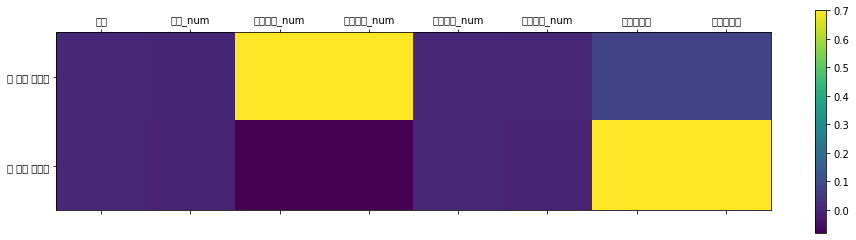

In [84]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['첫 번째 주성분','두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(sub.columns)),sub.columns)
plt.show()

## k-means

In [ ]:
# df 만들기
from sklearn.cluster import KMeans

km_col = ['comp1','comp2']
km_df = pd.DataFrame(sub_pca, columns=km_col)
km_df.dropna(inplace=True)

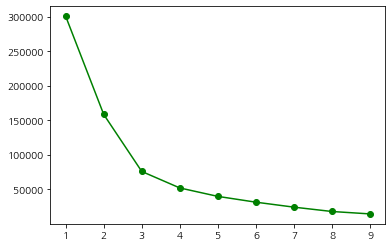

In [190]:

sse=[]
for i in range(1,10):
    km =KMeans(n_clusters=i)
    km.fit(sub_pca)
    sse.append(km.inertia_)
plt.plot(range(1,10),sse,'go-')
plt.show()

In [191]:
# k-means
km = KMeans(n_clusters=3, init='random',max_iter=100, random_state=0)
km.fit(sub_pca)
label_km = km.labels_
label_km

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [192]:
# 컬럼추가
km_df['label']=label_km
km_df

,comp1,comp2,label
0,0.619842,-0.228261,2
1,0.551945,-0.777158,2
2,0.636255,-0.044893,2
3,-3.054764,0.531635,0
4,0.573138,-0.675196,2
...,...,...,...
81089,0.636057,-0.144110,2
81090,0.742679,0.717337,2
81091,0.727133,0.803405,2
81092,0.583442,-0.562438,2


In [193]:
km_df.dropna(inplace=True)
len(km_df)

81094

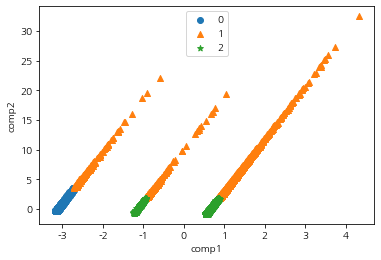

In [194]:
# 시각화
markers=['o','^','*']
for i,m in enumerate(markers):
    df_i = km_df[km_df['label']==i]
    x1 = df_i['comp1']
    x2 = df_i['comp2']
    plt.scatter(x1,x2,marker=m, label=i)
plt.legend(loc='upper center')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

## dbscan

In [1]:
sub_pca

NameError: ignored

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3,min_samples=200)
db.fit(sub_pca)
label_db = db.labels_
label_db

In [ ]:
# df 만들기
db_col = ['comp1','comp2']
db_df = pd.DataFrame(sub_pca, columns=db_col)
db_df['label']=label_db
db_df.dropna(inplace=True)
len(db_df)

81094

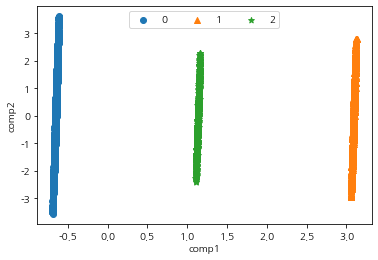

In [ ]:
# 시각화
markers=['o','^','*']
for i,m in enumerate(markers):
    df_i = db_df[db_df['label']==i]
    x1 = df_i['comp1']
    x2 = df_i['comp2']
    plt.scatter(x1,x2,marker=m, label=i)
plt.legend(loc='upper center',ncol=4)
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()

## 그룹 확인

In [ ]:
member_c.dropna(inplace=True)

In [ ]:
sub_d = member_c.copy()
sub_d['label']= db_df['label']

In [ ]:

sub_d.dropna(inplace=True)

In [ ]:
len(sub_d['label'])

81094

In [ ]:
sub_d['label'].unique()

array([ 0,  1, -1,  2])

In [ ]:
len(sub_d[sub_d['label']== 0])

65298

In [ ]:
len(sub_d[sub_d['label']== 2])

3109

In [ ]:
len(sub_d[sub_d['label']== 1])

12502

In [ ]:
len(sub_d[sub_d['label']== -1.0])

185

In [ ]:
sub_d_0 = sub_d[sub_d['label']== 0]
sub_d_0['결혼유무_num'].unique()

array([1])

In [ ]:
sub_d_0['자녀여부_num'].unique()
# 0은 기혼 자녀

array([1])

In [ ]:
sub_d_1 = sub_d[sub_d['label']== 1]

In [ ]:
sub_d_1['결혼유무_num'].unique()

array([0])

In [ ]:
sub_d_1['자녀여부_num'].unique()
# 1은 미혼 노자녀

array([0])

In [ ]:
sub_d_1.columns

Index(['ID', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '성별_num',
       '자녀여부_num', '결혼유무_num', '거주지역_num', '유입경로_num', 'label'],
      dtype='object')

In [ ]:
sub_d_2 = sub_d[sub_d['label']== 2]

In [ ]:
sub_d_2['결혼유무_num'].unique()

array([1])

In [ ]:
sub_d_2['자녀여부_num'].unique()
# 2는 기혼 노자녀

array([0])